![](img/banner.png)
%%HTML
<script src="require.js"></script>
# k-means Clustering

**Mahmood Amintoosi, Fall 2024**

Computer Science Dept, Ferdowsi University of Mashhad

**Definition of Clustering**

A clustering of a set of datapoints $\{x_1, x_2, \ldots, x_n\}$ is a partition of the datapoints into k disjoint subsets (or clusters) $\mathcal{C} = \{C_1, C_2, \ldots, C_k\}$ in such a way that datapoints in the same group are more similar (in some specific sense defined by the analyst) to each other than to those in other groups (clusters).

**k-means Clustering**

k-means clustering is a type of clustering that partitions the datapoints into k clusters based on their similarity to the centroid of each cluster. The goal of k-means clustering is to find the partition $\mathcal{C}$ that minimizes the sum of squared distances between each datapoint and the centroid of its assigned cluster.

**Lemma 1: Sum of Squared Distances to Any Point**

Let $\{x_1, x_2, \ldots, x_n\}$ be a set of datapoints and let $\mu$ be the centroid of the datapoints. The sum of squared distances of the datapoints to any arbitrary point $z$ equals the sum of squared distances to the centroid plus the number of datapoints times the squared distance from the point $z$ to the centroid. That is,

$$\sum_{i=1}^n |x_i - z|^2 = \sum_{i=1}^n |x_i - \mu|^2 + n |\mu - z|^2$$

Proof: 

$$
\begin{align*}
\sum_{i=1}^n |x_i - z|^2 &= \sum_{i=1}^n |x_i - \mu + \mu - z|^2 \\
&= \sum_{i=1}^n |x_i - \mu|^2 + 2(\mu - z) \cdot \sum_{i=1}^n (x_i - \mu) + n |\mu - z|^2 \\
&= \sum_{i=1}^n |x_i - \mu|^2 + n |\mu - z|^2
\end{align*}
$$
since $\sum_{i=1}^n (x_i - \mu) = 0$.

**Corollary 1: Centroid Minimizes Sum of Squared Distances**

The centroid minimizes the sum of squared distances since the second term, $n |\mu - z|^2$, is always positive.

Proof:

This follows directly from Lemma 1, since the second term, $n |\mu - z|^2$, is always positive.

**Lemma 2: Sum of Squared Distances Between All Pairs of Points**

Let $\{x_1, x_2, \ldots, x_n\}$ be a set of datapoints and let $\mu$ be the centroid of the datapoints. The sum of squared distances between all pairs of points equals the number of points times the sum of squared distances of the points to the centroid of the points. That is,

$$\sum_{i=1}^n \sum_{j>i} |x_i - x_j|^2 = n \sum_{i=1}^n |x_i - \mu|^2$$

Proof:

$$
\begin{align*}
\sum_{i=1}^n \sum_{j>i} |x_i - x_j|^2 &= \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n |x_i - x_j|^2 \\
&= \frac{1}{2} \sum_{j=1}^n (\sum_{i=1}^n |x_i - x_j|^2) \\
&= \frac{1}{2} \sum_{j=1}^n (\sum_{i=1}^n |x_i - \mu|^2 + n |\mu - x_j|^2) \tag{Lemma 1}\\
&= \frac{1}{2} \left(\sum_{j=1}^n (\sum_{i=1}^n |x_i - \mu|^2) + n \sum_{j=1}^n(|\mu - x_j|^2)\right)\\
&= \frac{1}{2} \left(n\sum_{i=1}^n |x_i - \mu|^2) + n\sum_{i=1}^n |x_i - \mu|^2)\right)\\
&= n \sum_{i=1}^n |x_i - \mu|^2
\end{align*}
$$

**k-means Clustering Algorithm**

The k-means clustering algorithm is a natural algorithm for k-means clustering. The algorithm starts with k initial centroids and iteratively updates the centroids and assigns each datapoint to its nearest centroid until convergence.

1. Initialize k initial centroids $\mu_1, \ldots, \mu_k$ randomly.
2. For each iteration, perform the following steps:
   1. Assign each datapoint $x_i$ to the cluster $C_j$ with the nearest centroid $\mu_j$.
   2. Update the centroids $\mu_1, \ldots, \mu_k$ as the mean of all datapoints assigned to each cluster.
3. Repeat step 2 until convergence.

**Convergence of k-means Algorithm**

The k-means algorithm always converges, but possibly to a local minimum. To show convergence, we argue that the cost of the clustering, the sum of the squares of the distances of each datapoint to its cluster centroid, always improves.

Here is a Python implementation of the k-means clustering algorithm:



In [23]:
import numpy as np

def kmeans(data, k):
    # Initialize centroids randomly
    centroids = data[np.random.choice(range(len(data)), size=k, replace=False)]

    while True:
        # Assign each data point to the closest centroid
        labels = np.argmin(np.linalg.norm(data[:, np.newaxis] - centroids, axis=2), axis=1)

        # Compute new centroids as the mean of all data points assigned to each centroid
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

        # Check for convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return centroids, labels


## Using OOP for implememntation of k-means


This notebook first generates some sample data and defines a KMeansClustering class that implements the K-Means algorithm. The fit method initializes the centroids randomly and then iteratively updates them until convergence. 

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generate some sample data
np.random.seed(0)
# n_samples = 100
# data = np.random.rand(n_samples, 2)

# Define the KMeans class
class KMeansClustering:
    def __init__(self, k):
        self.data = None
        self.k = k
        self.centroids = None
        self.labels = None

    def fit(self, data):

        self.data = data
        n_samples = len(self.data)    
        # Initialize centroids randomly
        self.centroids = self.data[np.random.choice(range(n_samples), size=self.k, replace=False)]

        while True:
            # Assign each data point to the closest centroid
            self.labels = np.argmin(np.linalg.norm(self.data[:, np.newaxis] - self.centroids, axis=2), axis=1)

            # Compute new centroids as the mean of all data points assigned to each centroid
            new_centroids = np.array([self.data[self.labels == i].mean(axis=0) for i in range(self.k)])

            # Check for convergence
            if np.all(self.centroids == new_centroids):
                break

            self.centroids = new_centroids

The following script creates an instance of the KMeansClustering class, fits the model to the data, and plots the data with centroids and labels.

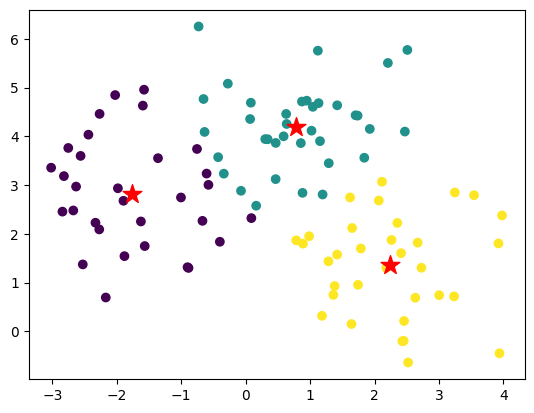

In [25]:
from sklearn.datasets import make_blobs
from scipy.spatial import distance_matrix

# Create an instance of the KMeansClustering class
kmeans = KMeansClustering(k=3)

n_samples = 100
X, y = make_blobs(n_samples=n_samples, centers=3, n_features=2,
                  random_state=0)
# Fit the model to the data
kmeans.fit(X)

# Plot the data with centroids and labels
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], marker='*', s=200, c='red')
plt.show()

Now, let's use the Lemma 2 to prove that the centroid minimizes the sum of squared distances

$$\sum_{i=1}^n \sum_{j>i} |x_i - x_j|^2 = n \sum_{i=1}^n |x_i - \mu|^2$$


function `lemma_2` implements the Lemma 2. The lemma states that the sum of squared distances of all data points is equal to the number of data points times the squared distance from the centroid to the mean of the data points. The notebook tests the lemma on a subset of the data (cluster 0).


In [26]:
def lemma_2(data, centroid):
    n = len(data)
    sum_squared_distances_to_centroid = np.sum((data - centroid) ** 2)
    # Compute pairwise distances
    distances = distance_matrix(data, data)
    sum_squared_distances_of_all_points = np.sum(distances**2)/2
    print(sum_squared_distances_of_all_points, n * sum_squared_distances_to_centroid)

# Test the lemma for  cluster 0
centroid = kmeans.centroids[0]
lemma_2(X[kmeans.labels == 0], centroid)

1812.8736866847603 1812.8736866847605


## Optional materials related to k-means

* [SE Question: Minimizing the sum of distances between points and a point on the plane?](https://math.stackexchange.com/questions/3037564/minimizing-the-sum-of-distances-between-points-and-a-point-on-the-plane)
* [Geometric Median](https://en.wikipedia.org/wiki/Geometric_median)
* [Weiszfeld's algorithm (Andrew Vázsonyi)](https://en.wikipedia.org/wiki/Andrew_V%C3%A1zsonyi)
  - [M. Amintoosi, (2023) Challenges and Requirements of Persian Language Support in Citation Software (In Persian)](https://www.dropbox.com/scl/fi/meqz3eah19a0kxsswxpje/persian-ref-man-challenges-final-draft.pdf?rlkey=odeveabt22we2axrm26hb7utz&st=ofdoo1y0&dl=0)
* [Data clustering: 50 years beyond K-means - ScienceDirect](https://www.sciencedirect.com/science/article/abs/pii/S0167865509002323)
* [K-Means Factorizaton](https://www.dropbox.com/s/2fsmpj7i7x3rngy/K-Means%20Factorizaton1512.07548.pdf?dl=1)  
* [Balanced K-Means for Clustering | SpringerLink](https://link.springer.com/chapter/10.1007/978-3-662-44415-3_4)
* [M. Amintoosi, (2002) Student’s sectioning using fuzzy inference system (In Persian)](https://www.dropbox.com/s/7ohrff9c6im8bye/1382-StudentSectioning.pdf?dl=1)